In [1]:
pwd

'C:\\Users\\Milagros\\OneDrive\\Escritorio\\UTN\\5To AÑO\\Ciencia de datos'

In [2]:
#Importo librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#Importo el excel de train y test
df_train = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\Xy_train.csv', delimiter=",")
df_test = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\X_test.csv', delimiter=",")

In [4]:
df_train.head()

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744


In [5]:
df_train.shape

(100, 2)

In [6]:
df_train.describe()

,X,y
count,100.000000,100.000000
mean,4.534694,5.073047
std,2.734487,2.398315
min,0.050223,-0.259323
25%,2.415300,3.735343
50%,3.999217,4.670649
75%,6.686171,5.761732
max,9.728298,13.930549


In [7]:
#El df de test solo tiene los valores de x, no tiene las etiqeutas reales de y
df_test.head()

,X
0,6.170800
1,6.302022
2,8.689293
3,2.376897
4,2.707320


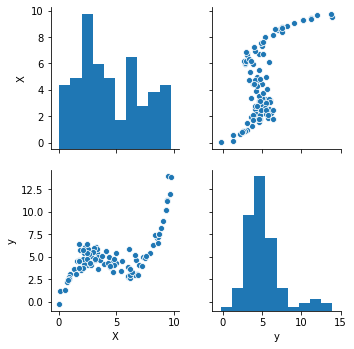

In [8]:
sns.pairplot(df_train)
plt.show()

In [9]:
#Separo las "x" de las "y" (etiquetas) del train 
#Guardo en Xreal, el df de test
x = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values
x_pre = df_test.iloc[:,:,].values


In [10]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

In [11]:
# Defino el escalador con el objeto MinmaxScaler
scaler = MinMaxScaler() 
# Fit para el x train
scaler = scaler.fit(x_train)
# Transformo los x_train
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
 # Agrego las features polinomicas (posterior al scaler)
# Elijo grado 5
grad_poly = 5

x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [13]:
#Comparo la cantidad de columnas que se agregan por las polinomicas
print(x_train_scaled.shape)
print(x_train_poly_scaled.shape)

(75, 1)
(75, 6)


In [14]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

In [15]:
#Creo el df de resultados, para volcar las metricas y poder comparar modelos

df_resultados = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

# Modelo 1: Regresion lineal (Features lineales)

In [ ]:

#Estimador
est = LinearRegression()
#Hyperparametros, solo el fit_intercept
parameters = {'fit_intercept' : [False, True]}
#Folds para cv
n_folds = 5
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [ ]:
#Entrenamos
gs.fit(x_train_scaled, y_train)

In [ ]:
# El mejor estimador y sus hyperparametros
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Preddecimos usando el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

In [ ]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mae:.6f}')
print(f'MSE: {linear_mse:.6f}')

In [ ]:
#A simple vista el R2 me dio muy bajo 

In [ ]:
#Guardo los resultados en el df de resultados
df_resultados = df_resultados.append({'Model':'Linear',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

In [ ]:
df_resultados

# Modelo 2: Regresion lineal (Features polinomicas grado 5)


In [ ]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [ ]:
df_resultados = df_resultados.append({'Model':'Linear',
                                'Features':'Polinom grado 5',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [ ]:
df_resultados

# Modelo 3: Regresion lineal (features polinomicas grado 3)

In [ ]:
 # Agrego las features polinomicas (posterior al scaler)
# Elijo grado 3
grad_poly = 3

x_train_poly_scaled= PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [ ]:
#Comparo cuantas columnas se agregaron por las features polinomicas
print(x_train_scaled.shape)
print(x_train_poly_scaled.shape)

In [ ]:
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

In [ ]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")


In [ ]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [ ]:
df_resultados = df_resultados.append({'Model':'Linear',
                                'Features':'Polinom grado 3',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

df_resultados

# Modelo 4: Regresion lineal (features polinomicas grado 2)

In [ ]:
 # Agrego las features polinomicas (posterior al scaler)
# Elijo grado 2
grad_poly = 2

x_train_poly_scaled= PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [ ]:
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

In [ ]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [ ]:
df_resultados = df_resultados.append({'Model':'Linear',
                                'Features':'Polinom grado 2',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

df_resultados

# Modelo 5: Regresion Ridge (features lineales)

In [ ]:
est = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")


In [ ]:
# Entrenamos
gs.fit(x_train_scaled, y_train)

In [ ]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [ ]:
#Predicciones + Metricas
ridge_prediction = gs.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

In [ ]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Plots
plt.scatter(ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mae:.6f}')
print(f'MSE: {ridge_mse:.6f}')

In [ ]:

df_resultados = df_resultados.append({'Model':'Ridge',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

df_resultados

# Modelo 6: Regresion Ridge (features polinomicas)

In [ ]:

# defino de nuevo las polinomicas
grad_poly = 5
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)


x_train_poly_scaled.shape

In [ ]:

#Definimos estimador
est = Ridge()
#Defini
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs.fit(x_train_poly_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)

In [ ]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [ ]:
# Prediccion + Metricas
poly_ridge_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)

In [ ]:
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mae:.6f}')
print(f'MSE: {poly_ridge_mse:.6f}')

In [ ]:
# Guardamos
df_resultados = df_resultados.append({'Model':'Ridge',
                                'Features':'Polinom grado 5',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)
df_resultados

# Decision final modelo

In [17]:
#Estimador
est = LinearRegression()
#Hyperparametros, solo el fit_intercept
parameters = {'fit_intercept' : [False, True]}
#Folds para cv
n_folds = 5

In [18]:
 # Agrego las features polinomicas (posterior al scaler)
# Elijo grado 3
grad_poly = 3

x_train_poly_scaled= PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [19]:
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

In [20]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-0.5362646178154453 



In [22]:
#Paso el xpred a polinomica
grad_poly = 3

x_pre_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_pre)

# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

In [27]:
poly_linear_prediction = gs.best_estimator_.predict(x_pre_poly_scaled)

In [25]:
poly_linear_prediction

array([1.37358939e+04, 1.47078447e+04, 4.12144892e+04, 5.07053568e+02,
       8.21906945e+02, 1.67166983e+04, 3.83233134e+04, 3.41005753e+00,
       4.80682535e+04, 7.86970183e+02, 1.57057780e+03, 1.55907198e+04,
       4.86933879e+04, 3.56872060e+00, 5.53180732e+03, 3.30881699e+04,
       6.71110242e+03, 1.26308057e+04, 2.21066856e+04, 1.45405333e+04])

In [32]:

d = poly_linear_prediction**(1 / 3)

In [33]:

d

array([23.94890394, 24.50095497, 34.54219838,  7.97415392,  9.36715162,
       25.56918203, 33.71483332,  1.50517583, 36.35962936,  9.23250233,
       11.62393443, 24.98170384, 36.51657167,  1.52816711, 17.68570384,
       32.10388436, 18.86244366, 23.28861629, 28.06561383, 24.40769561])